In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import cv2
import numpy as np
from tqdm import tqdm


In [3]:
train = datasets.MNIST("../data/", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("../data/", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=50, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=50, shuffle=True)

In [50]:
IM_SIZE = 28*28
IM_SHAPE = (28, 28)

# Just a simple PCA, works a little bit some pictures can be red.
# EPOCH = 3, Batch = 10 and cross_entropie         => loss = 310206
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1_en = nn.Linear(IM_SIZE, 16)
        self.fc1_de = nn.Linear(16, IM_SIZE)
        
    def forward(self, x):
        x = F.sigmoid(self.fc1_en(x))
        return F.sigmoid(self.fc1_de(x))
                
net = Net()
print(net)  

Net(
  (fc1_en): Linear(in_features=784, out_features=16, bias=True)
  (fc1_de): Linear(in_features=16, out_features=784, bias=True)
)


In [29]:

# 1 hidden layer and dropout:
# EPOCH = 3, Batch = 10 and mse                    => loss = 244880
# EPOCH = 3, Batch = 10 and cross_entropie         => loss = 192187
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1_en = nn.Linear(IM_SIZE, 64)
        self.fc2_en = nn.Linear(64, 16)
        self.fc1_de = nn.Linear(16, 64)
        self.fc2_de = nn.Linear(64, IM_SIZE)
        self.dropout = nn.Dropout2d(0.5)
        
    def forward(self, x):
        x = self.dropout(x)
        x = F.sigmoid(self.fc1_en(x))
        x = F.sigmoid(self.fc2_en(x))
        x = F.sigmoid(self.fc1_de(x))
        return F.sigmoid(self.fc2_de(x))
                
net = Net()
print(net)  

Net(
  (fc1_en): Linear(in_features=784, out_features=64, bias=True)
  (fc2_en): Linear(in_features=64, out_features=16, bias=True)
  (fc1_de): Linear(in_features=16, out_features=64, bias=True)
  (fc2_de): Linear(in_features=64, out_features=784, bias=True)
  (dropout): Dropout2d(p=0.5, inplace=False)
)


In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 10

for epoch in range(EPOCHS):
    for X, _ in tqdm(trainset):
        net.zero_grad()
        output = net(X.view(-1, IM_SIZE))
        loss = F.binary_cross_entropy(output, X.view(-1, IM_SIZE), reduction='sum')
        loss.backward()
        optimizer.step()
    print(epoch, loss)

  0%|          | 20/6000 [00:00<00:31, 192.12it/s]

0 tensor(1485.8751, grad_fn=<BinaryCrossEntropyBackward>)


  1%|          | 32/6000 [00:00<00:18, 317.21it/s]

1 tensor(1194.1504, grad_fn=<BinaryCrossEntropyBackward>)


  0%|          | 18/6000 [00:00<00:33, 179.58it/s]

2 tensor(1240.1167, grad_fn=<BinaryCrossEntropyBackward>)


  0%|          | 19/6000 [00:00<00:32, 185.24it/s]

3 tensor(1225.3616, grad_fn=<BinaryCrossEntropyBackward>)


  0%|          | 19/6000 [00:00<00:31, 186.95it/s]

4 tensor(1282.3644, grad_fn=<BinaryCrossEntropyBackward>)


  0%|          | 17/6000 [00:00<00:35, 167.82it/s]

5 tensor(1139.2238, grad_fn=<BinaryCrossEntropyBackward>)


  1%|          | 33/6000 [00:00<00:18, 323.77it/s]

6 tensor(1195.7665, grad_fn=<BinaryCrossEntropyBackward>)


  0%|          | 19/6000 [00:00<00:32, 184.55it/s]

7 tensor(1135.7449, grad_fn=<BinaryCrossEntropyBackward>)


  0%|          | 14/6000 [00:00<00:43, 137.72it/s]

8 tensor(1181.1029, grad_fn=<BinaryCrossEntropyBackward>)


 61%|██████▏   | 3675/6000 [00:15<00:12, 184.29it/s]

100%|██████████| 1000/1000 [00:01<00:00, 608.44it/s]


tensor(310206.6562)


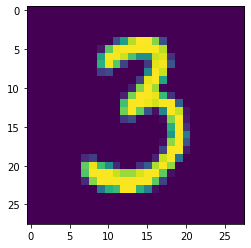

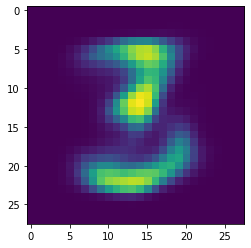

In [52]:
loss = 0
with torch.no_grad():
    for X, _ in tqdm(testset):
        output = net(X.view(-1, IM_SIZE))
        loss += F.mse_loss(output, X.view(-1, IM_SIZE), reduction='sum')

print(loss)
plt.imshow(X[0].view(IM_SHAPE))
plt.show()
plt.imshow(output[0].view(IM_SHAPE))
plt.show()
